### Points to Address (Accessing)
1. Data data has error in some places, day and month has to be rearranged
   data1 and data6 has corrupt or erreneous data in datetime table.
   
2. Database is not exactly sorted w.r.t. to date
   Data1, Data6 and data6 has unsorted rows in some places
   
3. Fuel Voltage data has increasing trends in 5 out of 6 datafiles. But in actual, the trend must be decreasing wth time

4. Erreneous cumulative distance trends in file1, file4 and file6
5. There are outliers in all of the datsets. That has to be removed
6. Datetime data type is set as object.
7. Voltage data is in Hex form. Need to be corrected.
8. 'io_state' date is not uniform, it ranges from 1 bit to 8 bit. Additional zero padding is required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, naive_bayes
import statsmodels 
%matplotlib inline

#### Data Gathering

In [109]:
df1 = pd.read_csv("data\cordinates_008527815166.csv", names= ['id',"lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'b2'])
df2 = pd.read_csv("data\cordinates_008527945276.csv", names= ['id',"lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'b2'])
df3 = pd.read_csv("data\cordinates_008527946327.csv", names= ['id',"lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'b2'])

df4 = pd.read_csv(r"data\cordinates_009821737256.csv", names= ["lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'id'])
df5 = pd.read_csv(r"data\cordinates_009821746470.csv", names= ["lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'id'])
df6 = pd.read_csv(r"data\cordinates_009821747419.csv", names= ["lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'id'])

# df4 = pd.read_csv(r"data\008527949981.csv")
# df5 = pd.read_csv(r"data\008826369174.csv")
# df6 = pd.read_csv(r"data\009821702910.csv")

In [110]:
(df1.head())

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,blnk,b2
0,1.679735e+09,28.710498,77.179178,2017-12-04 08:46:59,NaN,8527815166,0.0,0.0,0,2017-12-04 08:46:54,10000007,A,NaN,NaN
1,1.679735e+09,28.710498,77.179178,2017-12-04 08:48:58,NaN,8527815166,0.0,0.0,0,2017-12-04 08:48:55,10000007,A,NaN,NaN
2,1.679735e+09,28.710498,77.179178,2017-12-04 08:49:56,NaN,8527815166,0.0,0.0,0,2017-12-04 08:49:55,10000007,A,NaN,NaN
3,1.679735e+09,28.710498,77.179178,2017-12-04 08:50:57,NaN,8527815166,0.0,0.0,0,2017-12-04 08:50:55,10000007,A,NaN,NaN
4,1.679735e+09,28.710400,77.179047,2017-12-04 08:51:58,NaN,8527815166,0.0,0.0,0,2017-12-04 08:51:53,10000007,A,NaN,NaN


In [111]:
df4.head()

,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,blnk,id
NaN,28.710207,77.178333,2018-02-15 09:10:29,NaN,9821737256,0.0,0.0,0,2018-02-15 09:10:24,10000003,A,NaN,2369055810
NaN,28.710207,77.178333,2018-02-15 09:10:59,NaN,9821737256,0.0,0.0,0,2018-02-15 09:10:54,10000003,A,NaN,2369055811
NaN,28.710207,77.178333,2018-02-15 09:11:27,NaN,9821737256,0.0,0.0,0,2018-02-15 09:11:24,10000003,A,NaN,2369055812
NaN,28.710207,77.178333,2018-02-15 09:11:58,NaN,9821737256,0.0,0.0,0,2018-02-15 09:11:54,10000003,A,NaN,2369055813
NaN,28.710207,77.178333,2018-02-15 09:12:29,NaN,9821737256,0.0,0.0,0,2018-02-15 09:12:24,10000003,A,NaN,2369055814


### Data Wrangling - Part 1
#### Extracting relevant hex data to convert to int.

In [101]:
## Zero padding 'IO_state' data

df1['io_state']= df1.io_state.apply(lambda x: x.zfill(8))
df2['io_state']= df2.io_state.apply(lambda x: x.zfill(8))
df3['io_state']= df3.io_state.apply(lambda x: x.zfill(8))
df4['io_state']= df4.io_state.apply(lambda x: x.zfill(8))
df5['io_state']= df5.io_state.apply(lambda x: x.zfill(8))
df6['io_state']= df6.io_state.apply(lambda x: x.zfill(8))

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 191194 entries, 1679735159.0 to nan
Data columns (total 13 columns):
lat             191194 non-null float64
long            191194 non-null float64
created_at      191194 non-null object
updated_at      0 non-null float64
device_id       191194 non-null int64
speed           191194 non-null float64
orientation     191194 non-null float64
distance        191194 non-null int64
received_at     191194 non-null object
io_state        191194 non-null object
availability    191194 non-null object
blnk            0 non-null float64
id              148461 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 20.4+ MB


In [106]:
df1.head()

,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,blnk,id
1.679735e+09,28.710498,77.179178,2017-12-04 08:46:59,NaN,8527815166,0.0,0.0,0,2017-12-04 08:46:54,10000007,A,NaN,NaN
1.679735e+09,28.710498,77.179178,2017-12-04 08:48:58,NaN,8527815166,0.0,0.0,0,2017-12-04 08:48:55,10000007,A,NaN,NaN
1.679735e+09,28.710498,77.179178,2017-12-04 08:49:56,NaN,8527815166,0.0,0.0,0,2017-12-04 08:49:55,10000007,A,NaN,NaN
1.679735e+09,28.710498,77.179178,2017-12-04 08:50:57,NaN,8527815166,0.0,0.0,0,2017-12-04 08:50:55,10000007,A,NaN,NaN
1.679735e+09,28.710400,77.179047,2017-12-04 08:51:58,NaN,8527815166,0.0,0.0,0,2017-12-04 08:51:53,10000007,A,NaN,NaN


In [114]:
df1.io_state[2][-3:]

'007'

In [115]:
a = df1.io_state[2][-3:]
int(a,16)

7

In [116]:
df1['FuelVoltage']= df1.io_state.apply(lambda x: int(x[-3:],16))
df2['FuelVoltage']= df2.io_state.apply(lambda x: int(x[-3:],16))
df3['FuelVoltage']= df3.io_state.apply(lambda x: int(x[-3:],16))
df4['FuelVoltage']= df4.io_state.apply(lambda x: int(x[-3:],16))
df5['FuelVoltage']= df5.io_state.apply(lambda x: int(x[-3:],16))
df6['FuelVoltage']= df6.io_state.apply(lambda x: int(x[-3:],16))

In [117]:
df1.FuelVoltage.describe()

count    191194.000000
mean        186.883433
std         226.022581
min           3.000000
25%           3.000000
50%           7.000000
75%         465.000000
max         527.000000
Name: FuelVoltage, dtype: float64

In [118]:
### Extracting Device State: ON/OFF from io_state data


In [119]:
df1['dev_state']= df1.io_state.apply(lambda x: x[1])
df2['dev_state']= df2.io_state.apply(lambda x: x[1])
df3['dev_state']= df3.io_state.apply(lambda x: x[1])
df4['dev_state']= df4.io_state.apply(lambda x: x[1])
df5['dev_state']= df5.io_state.apply(lambda x: x[1])
df6['dev_state']= df6.io_state.apply(lambda x: x[1])

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191194 entries, 0 to 191193
Data columns (total 16 columns):
id              42733 non-null float64
lat             191194 non-null float64
long            191194 non-null float64
created_at      191194 non-null object
updated_at      0 non-null float64
device_id       191194 non-null int64
speed           191194 non-null float64
orientation     191194 non-null float64
distance        191194 non-null int64
received_at     191194 non-null object
io_state        191194 non-null object
availability    191194 non-null object
blnk            0 non-null float64
b2              148461 non-null float64
FuelVoltage     191194 non-null int64
dev_state       191194 non-null object
dtypes: float64(8), int64(3), object(5)
memory usage: 23.3+ MB


In [87]:
df1.head(500)

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,raw_data,new_cordinate_id,FuelVoltage,dev_state
0,2.025505e+09,28.710563,77.179337,2018-01-13 07:24:59,NaN,8527945276,0.9,0.00,256,2018-01-13 07:24:55,01000007,A,NaN,NaN,7,1
1,2.025505e+09,28.710615,77.179970,2018-01-13 07:10:41,NaN,8527945276,1.1,0.00,6,2018-01-13 07:10:24,01000007,A,NaN,NaN,7,1
2,2.025505e+09,28.710595,77.180145,2018-01-13 07:11:14,NaN,8527945276,1.8,87.40,21,2018-01-13 07:10:58,01000007,A,NaN,NaN,7,1
3,2.025505e+09,28.710597,77.180138,2018-01-13 07:11:24,NaN,8527945276,1.1,0.00,26,2018-01-13 07:11:22,01000007,A,NaN,NaN,7,1
4,2.025505e+09,28.710588,77.180013,2018-01-13 07:12:26,NaN,8527945276,0.9,0.00,50,2018-01-13 07:12:22,01000007,A,NaN,NaN,7,1
5,2.025505e+09,28.710562,77.180140,2018-01-13 07:13:26,NaN,8527945276,1.1,0.00,70,2018-01-13 07:13:22,01000007,A,NaN,NaN,7,1
6,2.025505e+09,28.710557,77.179758,2018-01-13 07:13:57,NaN,8527945276,0.5,0.00,72,2018-01-13 07:13:52,01000007,A,NaN,NaN,7,1
7,2.025505e+09,28.710557,77.179563,2018-01-13 07:14:27,NaN,8527945276,0.7,0.00,75,2018-01-13 07:14:23,01000007,A,NaN,NaN,7,1
8,2.025505e+09,28.710562,77.179562,2018-01-13 07:15:29,NaN,8527945276,0.5,0.00,75,2018-01-13 07:15:23,01000007,A,NaN,NaN,7,1
9,2.025505e+09,28.710538,77.179697,2018-01-13 07:16:27,NaN,8527945276,0.9,0.00,83,2018-01-13 07:16:23,01000007,A,NaN,NaN,7,1


### Data Wrangling - Part 2
#### Extracting relevant columns and storing to dataframe and csv files

In [121]:
mydf1 = pd.DataFrame()
mydf2 = pd.DataFrame()
mydf3 = pd.DataFrame()
mydf4 = pd.DataFrame()
mydf5 = pd.DataFrame()
mydf6 = pd.DataFrame()

mydf1[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df1[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf2[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df2[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf3[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df3[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf4[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df4[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf5[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df5[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf6[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df6[['received_at','speed','distance','FuelVoltage', 'dev_state']]

In [122]:
mydf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142990 entries, 0 to 142989
Data columns (total 5 columns):
datetime       142990 non-null object
speed          142990 non-null float64
distance       142990 non-null int64
fuelVoltage    142990 non-null int64
dev_state      142990 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 5.5+ MB


In [90]:
#mydf2.datetime = pd.to_datetime(mydf2.datetime)
mydf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 5 columns):
datetime       52516 non-null object
speed          52516 non-null float64
distance       52516 non-null int64
fuelVoltage    52516 non-null int64
dev_state      52516 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [127]:
mydf1.to_csv("data\data10.csv")
mydf2.to_csv("data\data11.csv")
mydf3.to_csv("data\data12.csv")
mydf4.to_csv("data\data7.csv")
mydf5.to_csv("data\data8.csv")
mydf6.to_csv("data\data9.csv")

#### Example Assesement

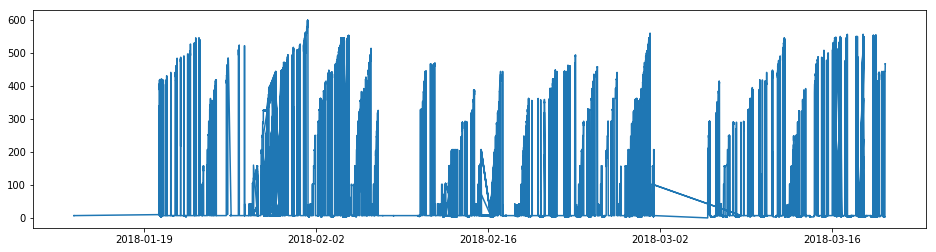

In [125]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(pd.to_datetime(mydf2.datetime),mydf2.fuelVoltage);

In [126]:
plt.plot(mydf6.index[:10000],mydf6.fuelVoltage[:10000]);

KeyError: 10000

In [48]:
df1.io_state.apply(lambda x: x.zfill(8))[70:800]

70     01000007
71     01000007
72     01000007
73     01000007
74     11000007
75     0000000A
76     0100000A
77     0000000A
78     0100000A
79     01000153
80     01000153
81     01000153
82     01000153
83     01000153
84     01000153
85     01000153
86     01000153
87     00000153
88     0000000A
89     0000000A
90     0000000A
91     0000000A
92     0000000A
93     0000000A
94     0000000A
95     0000000A
96     0000000A
97     0000000A
98     0000000A
99     0000000A
         ...   
770    00000007
771    00000007
772    00000007
773    00000007
774    00000007
775    00000007
776    01000007
777    01000192
778    010001A1
779    010001A0
780    000000BC
781    00000007
782    00000007
783    00000007
784    00000007
785    00000007
786    00000007
787    00000007
788    00000007
789    00000007
790    00000007
791    00000007
792    00000007
793    00000007
794    00000007
795    00000007
796    00000007
797    00000007
798    00000007
799    00000007
Name: io_state, Length: 

In [49]:
df1.io_state[7], len(df1.io_state[7])

('01000007', 8)

In [50]:
a = df1.io_state[7]
a.zfill(8)

'01000007'

In [51]:
a= '10000040'

In [52]:
a.zfill(8)

'10000040'

In [53]:
a = ['10','22','111']

In [54]:
df1.device_id[0],df2.device_id[0],df3.device_id[0],df4.device_id[0],df5.device_id[0],df6.device_id[0]

(8527945276, 8527946327, 8527948065, 9821737256, 9821746470, 9821747419)

In [55]:
df1[df1['dev_state']=='.'][['io_state','dev_state']]

,io_state,dev_state


In [56]:
df1.io_state[3856]

'010001E3'